In [5]:
import math
import numpy as np
import scipy
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
D = X.shape[1]
D_prime = 2
N = len(X)
print(N)

150


In [34]:
X = (X-np.mean(X,axis=0))/(np.std(X,axis=0)) # step 1
print(X.shape)
covariance = (np.matmul(X.transpose(), X))/(N-1) # step 2
print(covariance.shape)

eigvals, eigvecs = np.linalg.eig(covariance) # step 3
eigenvalues_sorted_indices = np.argsort(eigvals)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalues_sorted_indices]
eigenvectors_sorted = eigenvectors[:, eigenvalues_sorted_indices]
# Select the top k eigenvectors
k = 2
eigenvectors_subset = eigenvectors_sorted[:, 0:k] #instead of just :k
print(eigenvectors_subset)
transformed_X = np.dot(eigenvectors_subset.T, X.T).T
print(transformed_X.shape)

(150, 4)
(4, 4)
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]
(150, 2)


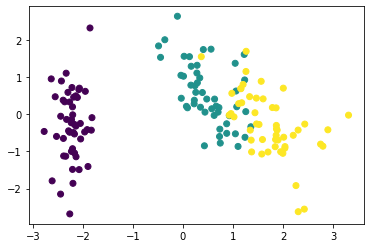

In [35]:
plt.scatter(transformed_X[:,0], transformed_X[:,1], c=y)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


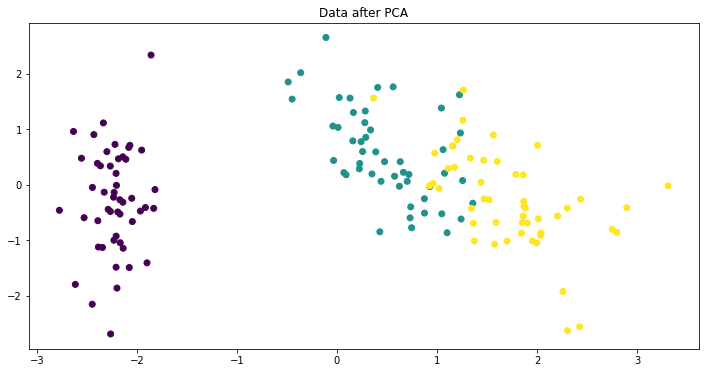

In [29]:
# Standardization: We standardize our data to have a mean of 0 and variance of 1. This ensures that PCA is not biased towards variables with larger scales.
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#%%
# Compute the covariance matrix
# The covariance matrix captures how each variable in the dataset relates to the others. In essence, it’s looking at how changes in one variable are associated with changes in another.
cov_matrix = np.cov(X_std.T)
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
eigenvalues_sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalues_sorted_indices]
eigenvectors_sorted = eigenvectors[:, eigenvalues_sorted_indices]
# Select the top k eigenvectors
k = 2
eigenvectors_subset = eigenvectors_sorted[:, 0:k] #instead of just :k
print(eigenvectors_subset)
#%%
# Transform the data
X_reduced = np.dot(eigenvectors_subset.T, X_std.T).T
#%%
eigenvectors_subset.shape
#%%
# Plotting the original and transformed data
plt.figure(figsize=(12, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.title('Data after PCA')
plt.show()
